In [14]:
import pandas as pd
import matplotlib as mt
import os
import traceback

#refactor the who code to the new database


#this will give you a list of stocks from the folder
cleaned_data_path='/workspaces/TosChartWeb/TosChart/cleaned_data'

stocks=os.listdir(cleaned_data_path)

lists=[]
####
##cleans all the strategy file so they match the same format
###
for stock in stocks:
    try:
        dt=pd.read_csv(cleaned_data_path+'/'+stock)
        dt.drop(columns=['Price','Amount','Position','P/L', 'Unnamed: 9','Side'], inplace=True)

        symb=dt.columns[0]
        date=dt.columns[2]

        ####
        for ind,num in enumerate(dt[date]):
            if ind%2!=0:
                if ind>0:
                    dt[date][ind-1]+='-'+num
            #trying somethin

        dt['Trade P/L']=dt['Trade P/L'].shift(periods=-1)

        for i,id in enumerate(dt[symb]):
            if int(id)%2==0:
                dt.drop(i, inplace=True)

        dt.dropna(inplace=True)
        hold=[]

        #creating holding period because i want to know how long i held the stock
        for index,date in enumerate(dt[date]):
            open, close=date.split('-')
            hold.append(pd.to_datetime(close)-pd.to_datetime(open))
        dt['Holding Time']=hold

        g=dt.columns[0].split()
        dt['Id']=g[1]
        dt.drop(columns=symb, inplace=True)
        lists.append(dt)
    except Exception as e:
        print(e)
        continue
print(lists)

    ##can i append a 

/tmp/ipykernel_7872/2392666252.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_7872/2392666252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

Error tokenizing data. C error: Expected 10 fields in line 17, saw 12



/tmp/ipykernel_7872/2392666252.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_7872/2392666252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

Error tokenizing data. C error: Expected 10 fields in line 20, saw 11

Error tokenizing data. C error: Expected 10 fields in line 32, saw 11

Error tokenizing data. C error: Expected 10 fields in line 26, saw 11

Error tokenizing data. C error: Expected 10 fields in line 11, saw 11



/tmp/ipykernel_7872/2392666252.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_7872/2392666252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

Error tokenizing data. C error: Expected 10 fields in line 13, saw 11

'utf-8' codec can't decode byte 0xff in position 1: invalid start byte
Error tokenizing data. C error: Expected 10 fields in line 20, saw 11

Error tokenizing data. C error: Expected 10 fields in line 31, saw 11

Error tokenizing data. C error: Expected 10 fields in line 5, saw 11



/tmp/ipykernel_7872/2392666252.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_7872/2392666252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

Error tokenizing data. C error: Expected 10 fields in line 5, saw 12

Error tokenizing data. C error: Expected 10 fields in line 3, saw 12

Error tokenizing data. C error: Expected 10 fields in line 29, saw 11



/tmp/ipykernel_7872/2392666252.py:30: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dt[date][ind-1]+='-'+num
/tmp/ipykernel_7872/2392666252.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

[               Strategy         Date/Time Trade P/L Holding Time    Id
0   keepbusy_cross(Buy)  11/22/02-1/22/03    $10.66      61 days  SHOO
2   keepbusy_cross(Buy)   6/14/04-6/15/04  ($12.56)       1 days  SHOO
4   keepbusy_cross(Buy)  7/24/09-11/20/09   $276.59     119 days  SHOO
6   keepbusy_cross(Buy)     4/1/11-6/9/11    $71.42      69 days  SHOO
8   keepbusy_cross(Buy)   1/13/12-4/10/12   $146.21      88 days  SHOO
10  keepbusy_cross(Buy)   1/18/13-2/27/13  ($87.25)      40 days  SHOO
12  keepbusy_cross(Buy)   4/26/13-6/24/13   ($3.26)      59 days  SHOO
14  keepbusy_cross(Buy)  10/27/17-11/1/17  ($66.11)       5 days  SHOO
16  keepbusy_cross(Buy)     7/8/19-7/9/19  ($17.99)       1 days  SHOO
18  keepbusy_cross(Buy)    9/9/19-1/13/20   $196.32     126 days  SHOO
20  keepbusy_cross(Buy)    6/25/21-7/8/21  ($51.14)      13 days  SHOO,                Strategy          Date/Time Trade P/L Holding Time   Id
0   keepbusy_cross(Buy)  11/16/01-12/18/01  ($51.50)      32 days  KEP
2   

In [15]:
comb=pd.concat(lists)
comb['Trade P/L'] = comb['Trade P/L'].str.replace(r'[\$,]', '', regex=True).replace(r'\((\d+(\.\d+)?)\)', r'-\1', regex=True)
comb['Trade P/L']=pd.to_numeric(comb['Trade P/L'])

comb['Trade P/L'].describe()

count    1333.000000
mean        7.216924
std        95.705942
min      -185.840000
25%       -43.990000
50%       -19.300000
75%        27.360000
max       677.750000
Name: Trade P/L, dtype: float64

In [16]:
sell=[]
for num in comb['Date/Time']:
    b, s=num.split('-')
    sell.append(s)
comb['Date']=sell
df=comb

/tmp/ipykernel_7872/1341245126.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


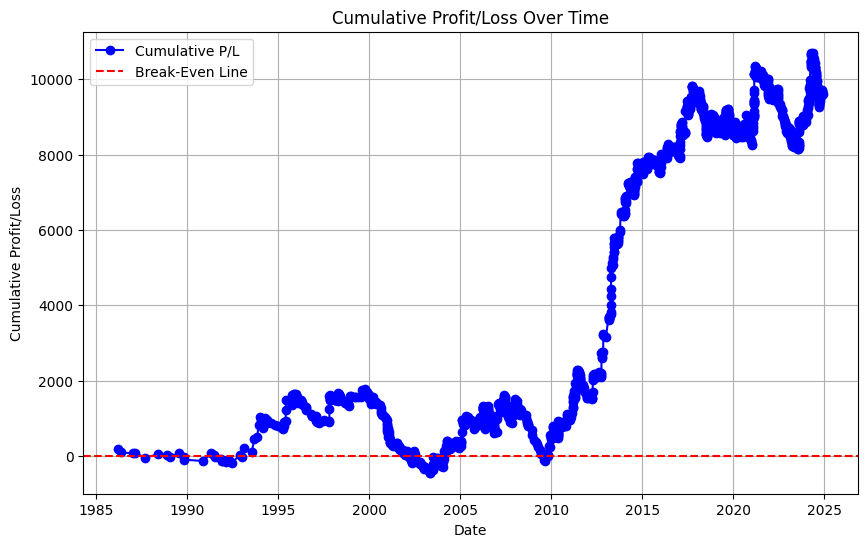

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Calculate cumulative P/L
df['Trade P/L'] = df['Trade P/L'].cumsum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Trade P/L'], marker='o', label='Cumulative P/L', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Break-Even Line')
plt.title('Cumulative Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
win=0
loss=0 
for t in comb['Trade P/L']:
    if t>0:
        win+=1
    if t<0:
        loss+=1
print(win, loss)

438 893
